In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50

from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob

In [3]:
IMAGE_SIZE = [224, 224]

train_path = 'cotton-disease/train'
valid_path = 'cotton-disease/test'

In [4]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

In [5]:
for layer in resnet.layers:
    layer.trainable = False

In [6]:
folders = glob('cotton-disease/train/*')

In [7]:
x = Flatten()(resnet.output)

In [8]:
len(folders)

4

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs = resnet.input, outputs = prediction)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [11]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('cotton-disease/train',
                                                 target_size = IMAGE_SIZE,
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('cotton-disease/test',
                                             target_size = IMAGE_SIZE,
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [15]:
len(test_set)

1

In [16]:
from PIL import Image

In [17]:
r = model.fit_generator(
    training_set, 
    validation_data = test_set, 
    epochs = 20, 
    steps_per_epoch = len(training_set), 
    validation_steps = len(test_set)
)

C:\Users\User\anaconda3\envs\DegreeProject\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 166s 2s/step - loss: 5.7235 - accuracy: 0.3079 - val_loss: 1.2208 - val_accuracy: 0.6111
Epoch 2/20
61/61 [==============================] - 108s 2s/step - loss: 1.1681 - accuracy: 0.5333 - val_loss: 1.0384 - val_accuracy: 0.4444
Epoch 3/20
61/61 [==============================] - 113s 2s/step - loss: 1.0185 - accuracy: 0.5772 - val_loss: 0.9207 - val_accuracy: 0.6111
Epoch 4/20
61/61 [==============================] - 113s 2s/step - loss: 0.9477 - accuracy: 0.5987 - val_loss: 1.0947 - val_accuracy: 0.6111
Epoch 5/20
61/61 [==============================] - 103s 2s/step - loss: 1.0216 - accuracy: 0.6319 - val_loss: 0.9199 - val_accuracy: 0.6111
Epoch 6/20
61/61 [==============================] - 102s 2s/step - loss: 0.7025 - accuracy: 0.7153 - val_loss: 0.9430 - val_accuracy: 0.7778
Epoch 7/20
61/61 [==============================] - 103s 2s/step - loss: 0.7645 - accuracy: 0.7029 - val_loss: 0.6570 - val_accuracy: 0.7778
Epoch 8/20
61

In [18]:
import matplotlib.pyplot as plt

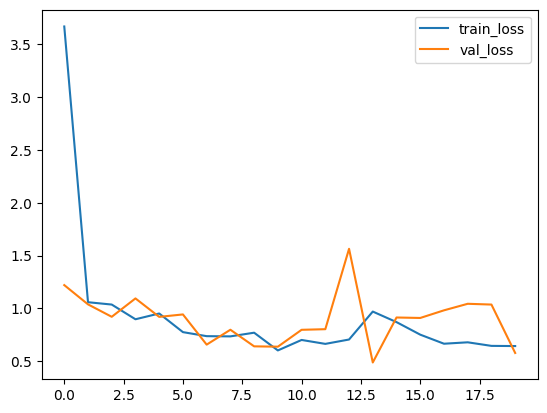

In [19]:
#plot the loss
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal')

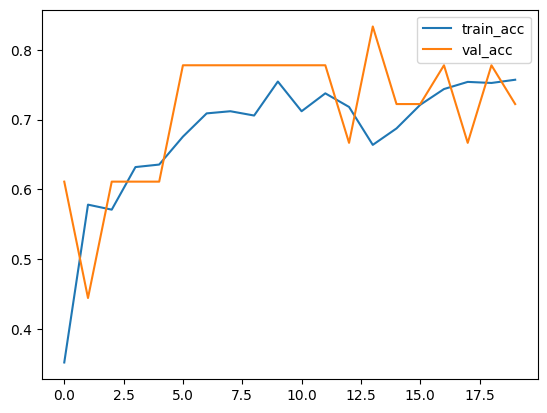

In [20]:
#plot the loss
plt.plot(r.history['accuracy'], label='train_acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig('Accuracy')

In [21]:
from tensorflow.keras.models import load_model

model.save('resnet50_model.h5')

In [22]:
y_pred = model.predict(test_set)
y_pred

array([[3.1442739e-02, 7.4706174e-02, 5.8107145e-02, 8.3574396e-01],
       [1.0408636e-01, 1.0627379e-03, 2.6745843e-02, 8.6810511e-01],
       [2.4796433e-03, 9.8152781e-01, 1.0323687e-02, 5.6688385e-03],
       [3.4609935e-03, 3.4633562e-01, 1.0130985e-02, 6.4007235e-01],
       [3.7133936e-03, 4.1470071e-06, 9.9628085e-01, 1.7069232e-06],
       [4.3821794e-05, 2.2925203e-06, 9.9992192e-01, 3.1898700e-05],
       [1.2150316e-03, 7.1380899e-04, 9.9758232e-01, 4.8884744e-04],
       [1.4928963e-02, 2.2788397e-03, 9.8256934e-01, 2.2292402e-04],
       [1.3679373e-01, 8.2383335e-01, 7.4838274e-03, 3.1889096e-02],
       [9.9967933e-01, 2.7553435e-07, 3.0722711e-04, 1.3230386e-05],
       [3.7411945e-03, 9.9456930e-01, 3.3491968e-05, 1.6560651e-03],
       [3.1074958e-03, 9.8283696e-01, 5.1323037e-05, 1.4004183e-02],
       [4.6403157e-03, 9.5628059e-01, 1.2384990e-02, 2.6694110e-02],
       [6.1060380e-02, 8.0824894e-01, 1.1826144e-01, 1.2429202e-02],
       [6.6537121e-03, 6.6807830e-

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis = 1)
y_pred

array([3, 3, 1, 3, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2], dtype=int64)

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model = load_model('resnet50_model.h5')

In [38]:
!nvidia-smi

Fri Aug 27 00:24:45 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 466.11       Driver Version: 466.11       CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   59C    P8    N/A /  N/A |   1414MiB /  2048MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------